# Dataset Information

Obtained from `https://archive.ics.uci.edu/dataset/222/bank+marketing`

## Description:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be `yes` or not `no` subscribed. 

## Input variables:
   ### Bank client data:
   1) `age` (numeric)
   2) `job` : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3) `marital` : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4) `education` (categorical: "unknown","secondary","primary","tertiary")
   5) `default`: has credit in default? (binary: "yes","no")
   6) `balance`: average yearly balance, in euros (numeric) 
   7) `housing`: has housing loan? (binary: "yes","no")
   8) `loan`: has personal loan? (binary: "yes","no")
   ### Related with the last contact of the current campaign:
   9) `contact`: contact communication type (categorical: "unknown","telephone","cellular") 
  10) `day`: last contact day of the month (numeric)
  11) `month`: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12) `duration`: last contact duration, in seconds (numeric)
  ### Other attributes:
  13) `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14) `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15) `previous`: number of contacts performed before this campaign and for this client (numeric)
  16) `poutcome`: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17) `y` - has the client subscribed a term deposit? (binary: "yes","no")

# Loading Data & Exploration

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [51]:
# ===== Load Dataset =====
df = pd.read_csv(r"C:\Users\Guillaume\Documents\PROJECTS\ML-Bank-Marketing\data\raw\bank-full.csv", sep=";")

df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [52]:
df.shape

(45211, 17)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [54]:
obj_cols = [c for c in df.select_dtypes(include=["object"]).columns if c != 'y']
print(obj_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [55]:
binary_cols = [c for c in obj_cols if df[c].dropna().nunique() == 2]
print(binary_cols)

['default', 'housing', 'loan']


In [56]:
df.describe(include='all') # includee='all' includes the remaining categorical variables

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


Numerical: age, balance, day, duration, campaign, pdays, previous \
Categorical: job, marital, education, default, housing, load, contact, month, poutcome, y

Notes:
- Preprocessing: one-hot encoding for categorical variables more than 2 classes
- Binary encoding for variables with 2 classes (`default`, `housing`, `loan`, `y`)

# Binary Encoding

In [57]:
df_binary = [
    'default', 'housing', 'loan', 'y'
]

df[df_binary] = df[df_binary].replace({
    'yes': 1, 'no': 0
})

C:\Users\Guillaume\AppData\Local\Temp\ipykernel_30348\2257296446.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [58]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0


# One-Hot Encoding

In [59]:
df_multi = [
    'job', 'marital','education','contact','month','poutcome'
]

df = pd.get_dummies(df, columns=df_multi, drop_first=True)

In [60]:
df.head(3)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


# Data Cleaning

In [61]:
df_bool = df.select_dtypes(include='bool').columns
df[df_bool] = df[df_bool].astype(int)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  int64
 12  job_entrepreneur     45211 non-null  int64
 13  job_housemaid        45211 non-null  int64
 14  job_management       45211 non-null  int64
 15  job_retired          45211 non-null  int64
 16  job_self-employed    4

In [63]:
corr_matrix = df.corr(numeric_only=True)
y_corr = corr_matrix[['y']].sort_values(by='y', ascending=False)
print(y_corr)

                            y
y                    1.000000
duration             0.394521
poutcome_success     0.306788
month_mar            0.129456
month_oct            0.128531
month_sep            0.123185
pdays                0.103621
previous             0.093236
job_retired          0.079245
job_student          0.076897
month_dec            0.075164
education_tertiary   0.066448
marital_single       0.063526
balance              0.052838
month_feb            0.038417
job_management       0.032919
poutcome_other       0.031955
age                  0.025155
job_unemployed       0.020390
contact_telephone    0.014042
education_unknown    0.012053
job_self-employed    0.000855
job_unknown          0.000267
month_aug           -0.008536
month_jan           -0.008783
job_technician      -0.008970
month_nov           -0.014937
job_housemaid       -0.015195
month_jun           -0.016805
job_entrepreneur    -0.019662
default             -0.022419
job_services        -0.027864
day       

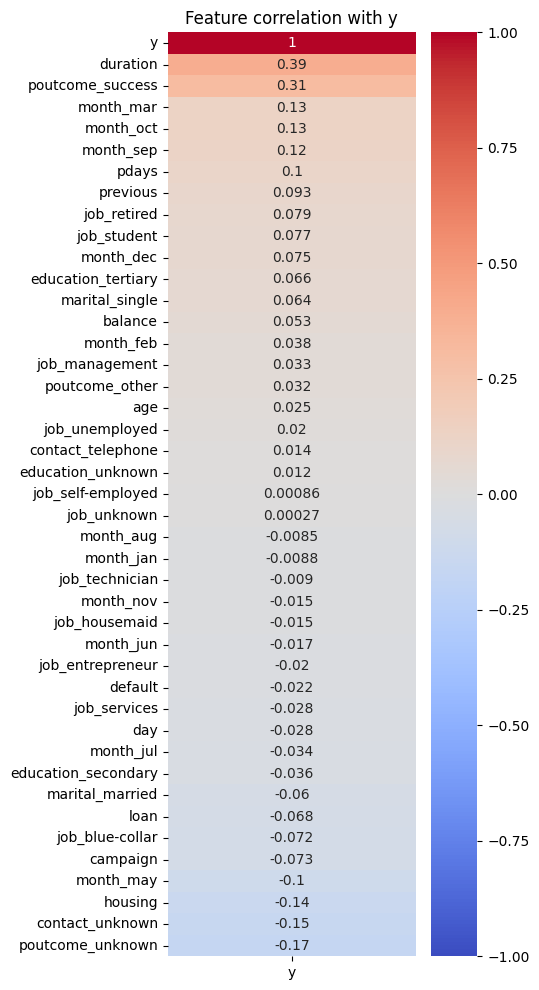

In [64]:
corr_matrix = df.corr(numeric_only=True) 
y_corr = corr_matrix[['y']].sort_values(by='y', ascending=False) 

plt.figure(figsize=(4,12)) 
sns.heatmap(y_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 
plt.title('Feature correlation with y') 
plt.show()

Notes:
- duration (0.39) = Clients with a longer duration tend to subscribe a term deposit
- poutcome_success (0.31) = Clients who also subscribed from the previous campaign tend to resubscribe
- poutcome_unknown (-0.17) = Clients who had unknown subscription status from the previous campaign had lower chances of subscribing to a term deposit

# Multicollinearity Chech (VIF)

In [65]:
X = df.drop(columns=['y'])
df_bool = X.select_dtypes(include='bool').columns
X[df_bool] = X[df_bool].astype(int)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

                feature        VIF
41     poutcome_unknown  23.655041
0                   age  19.405497
35            month_may   6.254635
5                   day   5.899113
21      marital_married   5.824164
23  education_secondary   4.767843
24   education_tertiary   4.433690
8                 pdays   4.128600
13       job_management   3.738496
33            month_jun   3.615882
22       marital_single   3.435989
27      contact_unknown   3.400850
32            month_jul   3.368762
28            month_aug   3.319335
3               housing   3.126835
10      job_blue-collar   2.974646
18       job_technician   2.459455
36            month_nov   2.215264
6              duration   2.017795
7              campaign   2.005924
30            month_feb   1.882490
14          job_retired   1.794999
16         job_services   1.754023
31            month_jan   1.511183
9              previous   1.475914
40     poutcome_success   1.369874
39       poutcome_other   1.364387
15    job_self-emplo

# Machine Learning

In [67]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

Imbalanced target class =>
- Workaround: Stratified Sampling
- Ensure the right metric
    - Recall if outreach is cheap (false positives not too costly)
    - Precision if outreach is expensive
    - F1 for balanced

In [68]:
from sklearn.model_selection import train_test_split

# ===== Prepare Data ===== #
X = df.drop(columns = ['y'])
y = df['y']

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y,
    test_size=0.1,
    stratify=y,
    random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=1/6,
    stratify=y_trainval,
    random_state=42
)

THRESHOLD = 0.4

### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ===== Train RF Model ===== #
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

proba = rf.predict_proba(X_val)[:,1]
y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9405    0.9579    0.9491      5989
           1     0.6305    0.5422    0.5831       793

    accuracy                         0.9093      6782
   macro avg     0.7855    0.7501    0.7661      6782
weighted avg     0.9042    0.9093    0.9063      6782



In [70]:
# ===== Threshold Tuning ===== #
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_val)[:,1]

print("Threshold tuning - Random Forest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_val, preds, pos_label=1)
    rec = recall_score(y_val, preds, pos_label=1)
    f1 = f1_score(y_val, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.4f}{rec:<8.4f}{f1:<8.4f}")

Threshold tuning - Random Forest
Thresh  Prec_1  Rec_1   F1_1    
0.1     0.3879  0.9533  0.5514  
0.15    0.4449  0.9067  0.5969  
0.2     0.4949  0.8525  0.6262  
0.25    0.5288  0.7982  0.6362  
0.3     0.5613  0.7163  0.6294  
0.35    0.5995  0.6381  0.6182  
0.4     0.6305  0.5422  0.5831  
0.45    0.6660  0.4426  0.5318  
0.5     0.7235  0.3695  0.4891  


Suppose that our target is to **minimize the wasted calls** but still try to go for **potential missed subscribers**, having a threshold of `0.4` would be okay.
- **Precision** (fewer false positives) = 0.6660

### LightGBM Classifier

In [71]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

# ===== Train LGBM Model ===== #
lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds.")

start_pred = time.time()
proba = lgbm.predict_proba(X_val)[:,1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.2f} seconds.")

print(classification_report(y_val, y_pred, digits=4))

ModuleNotFoundError: No module named 'lightgbm'

Interestingly, LightGBM performed worse for **Precision** at a threshold = 0.4:
- However, **Recall** and **F1-score** both increased, specifically **Recall** which had an increase of around 0.39

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_val)[:,1]

print("Threshold tuning - LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_val, preds, pos_label=1)
    rec = recall_score(y_val, preds, pos_label=1)
    f1 = f1_score(y_val, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.4f}{rec:<8.4f}{f1:<8.4f}")

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Getting ratio of y=0 to y=1
scale_pos_weight = (y_train == 0).sum() / (y_train == 0).sum()

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds.")

start_pred = time.time()
proba = xgb.predict_proba(X_val)[:,1]
y_pred = (proba>=THRESHOLD).astype(int)
pred_time = time.time()-start_pred
print(f"Prediction time: {pred_time:.2f} seconds.")

print(classification_report(y_val, y_pred, digits=4))


Training time: 0.42 seconds.
Prediction time: 0.01 seconds.
              precision    recall  f1-score   support

           0     0.9524    0.9516    0.9520      5989
           1     0.6366    0.6406    0.6386       793

    accuracy                         0.9152      6782
   macro avg     0.7945    0.7961    0.7953      6782
weighted avg     0.9154    0.9152    0.9153      6782



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_val)[:,1]

print("Threshold tuning - XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_val, preds, pos_label=1)
    rec = recall_score(y_val, preds, pos_label=1)
    f1 = f1_score(y_val, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.4f}{rec:<8.4f}{f1:<8.4f}")

Threshold tuning - XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.1     0.4277  0.9294  0.5859  
0.15    0.4814  0.8802  0.6224  
0.2     0.5185  0.8462  0.6430  
0.25    0.5519  0.7982  0.6526  
0.3     0.5785  0.7528  0.6542  
0.35    0.6069  0.7049  0.6523  
0.4     0.6366  0.6406  0.6386  
0.45    0.6609  0.5801  0.6179  
0.5     0.6746  0.4994  0.5739  


### Model Choice - XGBoost
- At a similar Precision score of `0.6609`, XGBoost (@ thresh = 0.45) has a higher recall than RF, which means **capturing more subscribers** and not only minimizing wasted calls

## Hyperparameter Tuning Using Optuna & Experiment Tracking (MLFlow)

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np


c:\Users\Guillaume\Documents\PROJECTS\ML-Bank-Marketing\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
THRESH = 0.45
N_SPLITS = 3

# Objective function for Optuna
def objective(trial):
    base_params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "random_state": 42,
        "n_jobs": -1,              # keep parallelism here
        "eval_metric": "logloss",
    }

    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    fold_scores = []
    
    for tr_idx, va_idx in skf.split(X_trainval, y_trainval):
        X_tr = X_trainval.iloc[tr_idx]
        y_tr = y_trainval.iloc[tr_idx]
        X_va = X_trainval.iloc[va_idx]
        y_va = y_trainval.iloc[va_idx]

        # IMPORTANT: scale_pos_weight should be computed per fold
        params = dict(base_params)
        params["scale_pos_weight"] = (y_tr == 0).sum() / max((y_tr == 1).sum(), 1)

        model = XGBClassifier(**params)
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_va, y_va)],
            verbose=False
        )

        proba = model.predict_proba(X_va)[:, 1]
        y_pred = (proba >= THRESH).astype(int)

        fold_scores.append(
            precision_score(y_va, y_pred, pos_label=1, zero_division=0)
        )

    return float(np.mean(fold_scores))

# ----------------------------
# 2) Run Optuna
# ----------------------------
study = optuna.create_study(direction="maximize")

# Avoid nested parallelism hell:
# - If XGBoost uses n_jobs=-1, keep Optuna n_jobs=1
study.optimize(objective, n_trials=100, n_jobs=1)

print("Best Params:", study.best_params)
print("Best CV Precision:", study.best_value)

# ----------------------------
# 3) Train final model on full trainval using best params, evaluate on holdout test
# ----------------------------
best_params = dict(study.best_params)
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "eval_metric": "logloss",
    "scale_pos_weight": (y_trainval == 0).sum() / max((y_trainval == 1).sum(), 1),
})

final_model = XGBClassifier(**best_params)
final_model.fit(X_trainval, y_trainval, verbose=False)

test_proba = final_model.predict_proba(X_test)[:, 1]
test_pred = (test_proba >= THRESH).astype(int)

test_precision = precision_score(y_test, test_pred, pos_label=1, zero_division=0)
print("Holdout Test Precision:", test_precision)

[I 2026-01-27 14:44:45,146] A new study created in memory with name: no-name-6af5ee09-54e3-454a-a34b-1613f918028c
[I 2026-01-27 14:44:47,847] Trial 0 finished with value: 0.4351629971351116 and parameters: {'n_estimators': 663, 'learning_rate': 0.05465698646477589, 'max_depth': 4, 'subsample': 0.6998035006997427, 'colsample_bytree': 0.6073870059758122, 'min_child_weight': 10, 'gamma': 4.124235630025993}. Best is trial 0 with value: 0.4351629971351116.
[I 2026-01-27 14:44:52,272] Trial 1 finished with value: 0.5173333394759427 and parameters: {'n_estimators': 694, 'learning_rate': 0.12052378321391799, 'max_depth': 7, 'subsample': 0.7110433573571724, 'colsample_bytree': 0.7601652581371483, 'min_child_weight': 7, 'gamma': 0.4920026025355373}. Best is trial 1 with value: 0.5173333394759427.
[I 2026-01-27 14:44:55,593] Trial 2 finished with value: 0.4983559663928249 and parameters: {'n_estimators': 525, 'learning_rate': 0.13502952027120865, 'max_depth': 8, 'subsample': 0.6499889225943176, '

Best Params: {'n_estimators': 977, 'learning_rate': 0.1300500912577778, 'max_depth': 10, 'subsample': 0.9269698779148268, 'colsample_bytree': 0.587735104054278, 'min_child_weight': 1, 'gamma': 0.013978903880027208}
Best CV Precision: 0.5721306954836559
Holdout Test Precision: 0.569811320754717


In [72]:
import plotly.io as pio

pio.renderers.default = 'browser'

# Timeline of all trials
fig = optuna.visualization.plot_timeline(study)
fig

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

In [ ]:
# Optimization history (best score per iteration)
fig = optuna.visualization.plot_optimization_history(study)
fig

In [ ]:
# Parameter importance
fig = optuna.visualization.plot_param_importances(study)
fig

In [ ]:
# Empirical distribution function (risk evaluation)
fig = optuna.visualization.plot_edf(study)
fig

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_val)[:,1]

print("Threshold tuning - XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_val, preds, pos_label=1)
    rec = recall_score(y_val, preds, pos_label=1)
    f1 = f1_score(y_val, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.4f}{rec:<8.4f}{f1:<8.4f}")

### Predict on Test Set

In [ ]:
# ===== Evaluate best XGBoost model on test set ===== #
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

xgb = XGBClassifier(**best_params)

start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds.")

start_pred = time.time()
proba = xgb.predict_proba(X_test)[:,1]
y_pred = (proba >= 0.45).astype(int)
pred_time = time.time()-start_pred
print(f"Prediction time: {train_time:.2f} seconds.")

print(classification_report(y_test, y_pred, digits=4))

### MLFlow

In [ ]:
from pathlib import Path
import mlflow
import mlflow.xgboost
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

project_root = Path.cwd().parent
mlflow.set_tracking_uri((project_root / "mlruns").as_uri())
mlflow.set_experiment("Bank Marketing Subscription - XGBoost")

with mlflow.start_run():
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })

    mlflow.log_params(best_params)

    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric('train_time', train_time)

    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:,1]
    y_pred = (proba >= 0.45).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric('pred_time', pred_time)

    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, y_pred)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)

    mlflow.xgboost.log_model(xgb, "model")

    print(classification_report(y_test, y_pred, digits=4))

